# Description of the exercise:

## Author - Philip Tannor
### This is not an exercise in which the whole problem should be solved. This is meant for the preprocessing stage, and is meant to help you learn to use pandas groupby in an efficient manner.

# use these lines to read the data and get a basic feel for what they're like

In [149]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [150]:
#2 alternative methods of reading the data
#df = pd.read_csv("https://rodeo-tutorials.s3.amazonaws.com/data/credit-data-non-null.csv")
df = pd.read_csv('credit-data-non-null.csv')

serious_dlqin2yrs


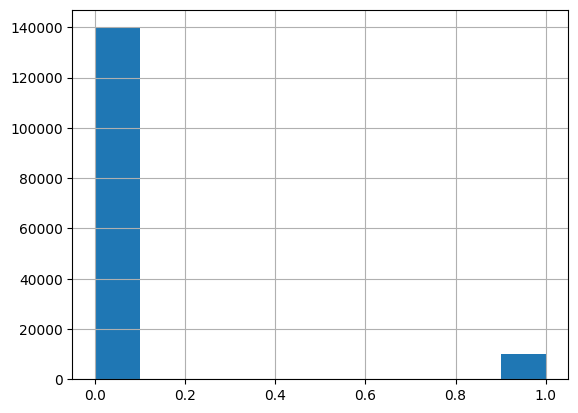

revolving_utilization_of_unsecured_lines


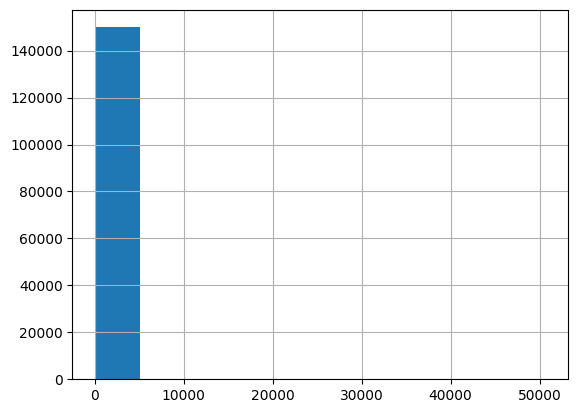

age


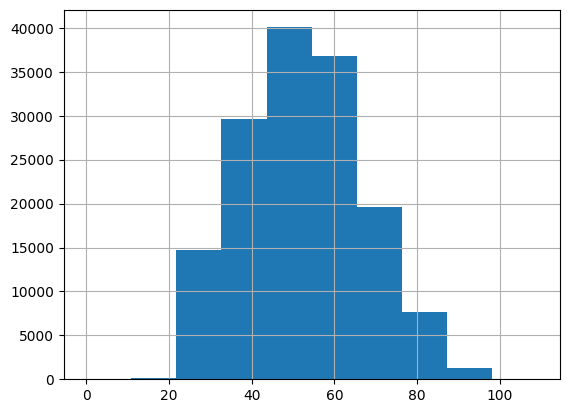

number_of_time30-59_days_past_due_not_worse


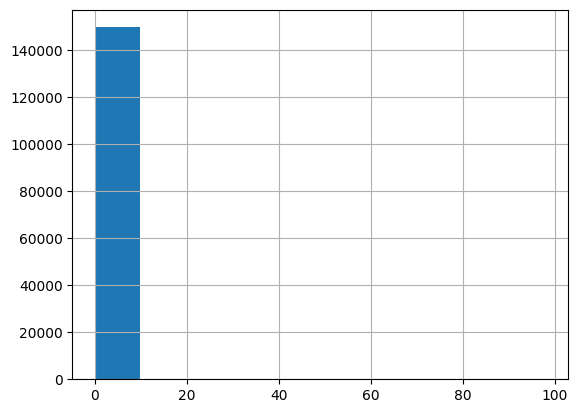

debt_ratio


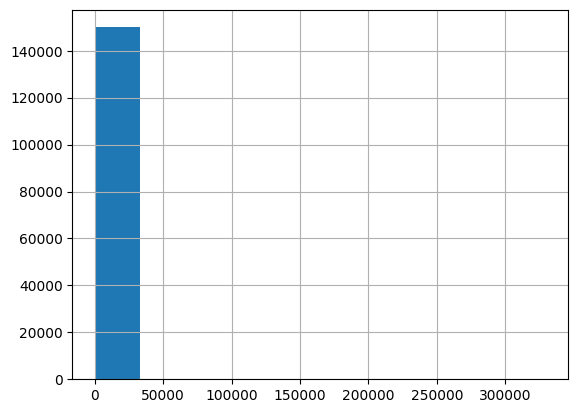

monthly_income


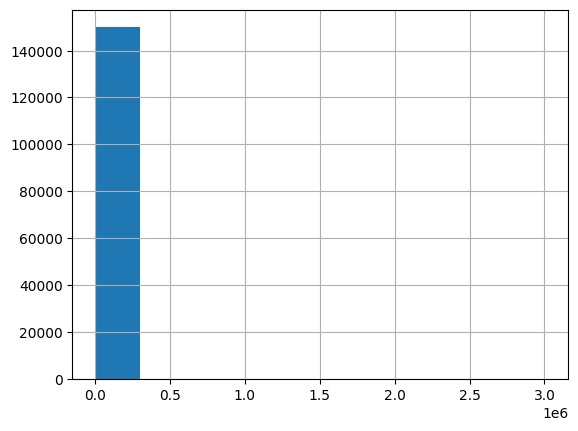

number_of_open_credit_lines_and_loans


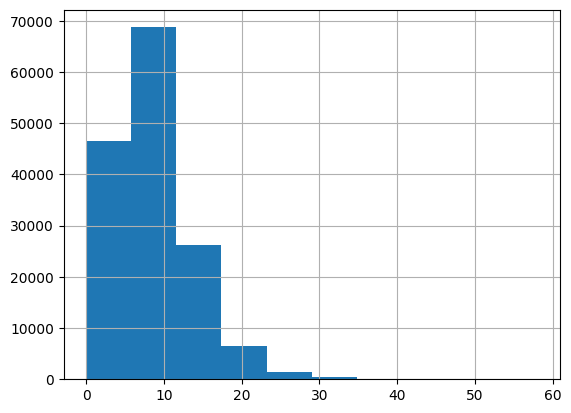

number_of_times90_days_late


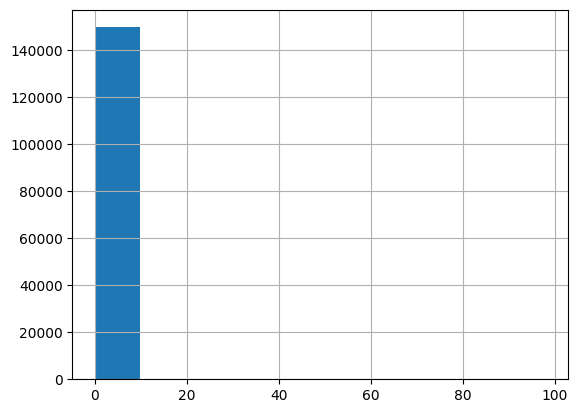

number_real_estate_loans_or_lines


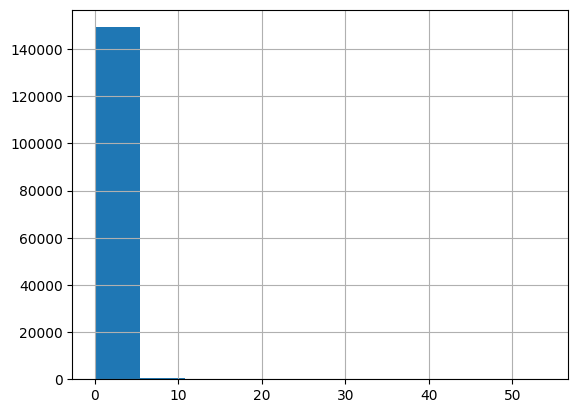

number_of_time60-89_days_past_due_not_worse


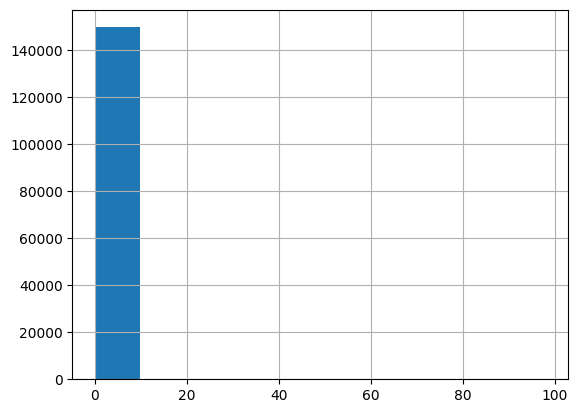

number_of_dependents


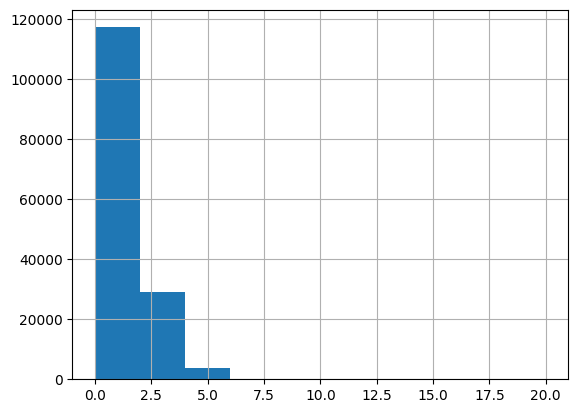

In [151]:
for col in df.columns:
    print(col)
    df[col].hist()
    plt.show()

# Now create a new groupby object, using .groupby
### start off by grouping by 'number_of_time30-59_days_past_due_not_worse'

In [152]:
g = df.groupby('number_of_time30-59_days_past_due_not_worse')

### Now we'll try to use functions which operate on the different groups. Start off with the simple ones: .sum(), .mean(), .max(), .count(). Calculate each one of these in a different cell.
### How are the records of the new DataFrame sorted?

In [153]:
g.sum()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
number_of_time30-59_days_past_due_not_worse,,,,,,,,,,
0,5041,795766.075191,6666495,4.439699e+07,679824904.0,1047749,6300,126390,3831,88719.0
1,2409,76957.277579,791942,5.633074e+06,90030367.0,145119,3595,17310,2555,14261.0
2,1219,32124.070342,223957,1.686687e+06,25553848.0,42908,1833,5158,1484,4452.0
3,618,1203.438486,86479,6.184366e+05,10028787.0,17427,916,2091,865,1763.0
4,318,527.272078,36968,3.233507e+05,4404568.0,7805,470,931,485,754.0
5,154,247.228444,16952,1.950276e+05,1816994.0,3835,228,457,249,321.0
6,74,99.314923,7070,6.852184e+04,844354.0,1681,122,225,124,162.0
7,28,41.356806,2810,1.434101e+04,325188.0,718,36,89,56,51.0
8,8,15.783076,1345,3.151627e+03,216081.0,356,24,68,34,28.0


In [154]:
g.mean()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
number_of_time30-59_days_past_due_not_worse,,,,,,,,,,
0,0.040002,6.314702,52.901133,352.306764,5394.665080,8.314280,0.049993,1.002952,0.030400,0.704018
1,0.150253,4.799930,49.394499,351.342500,5615.316348,9.051269,0.224225,1.079648,0.159359,0.889478
2,0.265115,6.986531,48.707482,366.830505,5557.600696,9.331883,0.398652,1.121792,0.322749,0.968247
3,0.352338,0.686111,49.303877,352.586413,5717.666477,9.935576,0.522235,1.192132,0.493158,1.005131
4,0.425703,0.705853,49.488621,432.865674,5896.342704,10.448461,0.629183,1.246319,0.649264,1.009371
5,0.450292,0.722890,49.567251,570.256063,5312.847953,11.213450,0.666667,1.336257,0.728070,0.938596
6,0.528571,0.709392,50.500000,489.441688,6031.100000,12.007143,0.871429,1.607143,0.885714,1.157143
7,0.518519,0.765867,52.037037,265.574318,6022.000000,13.296296,0.666667,1.648148,1.037037,0.944444
8,0.320000,0.631323,53.800000,126.065088,8643.240000,14.240000,0.960000,2.720000,1.360000,1.120000


In [155]:
g.max()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
number_of_time30-59_days_past_due_not_worse,,,,,,,,,,
0,1,50708.000000,109,329664.000000,3008750.0,58,17,54,11,10.0
1,1,17441.000000,99,307001.000000,1072500.0,48,15,25,7,20.0
2,1,12369.000000,101,49112.000000,440000.0,52,13,15,6,8.0
3,1,14.540918,96,14969.000000,96500.0,43,13,10,9,7.0
4,1,5.377748,92,11193.000000,234600.0,30,8,20,7,6.0
5,1,2.139535,91,18560.000000,46500.0,49,7,14,8,7.0
6,1,2.237856,77,32843.000000,48000.0,33,5,26,6,4.0
7,1,2.014975,87,4623.000000,24000.0,24,4,14,5,5.0
8,1,1.058160,81,3082.000000,30839.0,36,6,10,6,4.0


In [156]:
g.count()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
number_of_time30-59_days_past_due_not_worse,,,,,,,,,,
0,126018,126018,126018,126018,126018,126018,126018,126018,126018,126018
1,16033,16033,16033,16033,16033,16033,16033,16033,16033,16033
2,4598,4598,4598,4598,4598,4598,4598,4598,4598,4598
3,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754
4,747,747,747,747,747,747,747,747,747,747
5,342,342,342,342,342,342,342,342,342,342
6,140,140,140,140,140,140,140,140,140,140
7,54,54,54,54,54,54,54,54,54,54
8,25,25,25,25,25,25,25,25,25,25


### What happens if you try to see the "head" of the groupby object? Why? Try using len() on the original object, and then on .head(1), .head(2), etc...
### What if you try to use .iloc on it? or view the columns?

In [157]:
len(g)

16

In [158]:
g.head(1)

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
11,1,0.964673,40,3,0.382965,13700.0,9,3,1,1,2.0
163,0,1.095083,53,5,0.536704,3500.0,7,1,1,2,0.0
167,0,0.762159,44,4,0.224466,21000.0,5,0,1,0,3.0
214,1,1.048211,58,7,0.151957,3500.0,12,0,0,0,0.0
357,1,0.991502,61,10,1.297901,3000.0,11,2,3,5,1.0
860,1,0.232227,59,6,6.094453,2000.0,16,2,1,2,1.0
1402,1,1.000000,27,98,0.000000,2700.0,0,98,0,98,0.0


In [159]:
g.head(2)

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
11,1,0.964673,40,3,0.382965,13700.0,9,3,1,1,2.0
26,0,0.392995,58,2,0.436103,5500.0,15,0,1,0,0.0
32,0,0.881836,50,3,0.567858,4000.0,9,0,1,0,1.0
163,0,1.095083,53,5,0.536704,3500.0,7,1,1,2,0.0
167,0,0.762159,44,4,0.224466,21000.0,5,0,1,0,3.0


In [160]:
g.head(3)

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
11,1,0.964673,40,3,0.382965,13700.0,9,3,1,1,2.0
26,0,0.392995,58,2,0.436103,5500.0,15,0,1,0,0.0
27,0,0.704074,28,1,0.155201,4200.0,8,0,0,0,0.0
30,0,0.693330,42,2,0.257732,2230.0,7,0,0,0,0.0


### Now let's try more complicated aggregations. For this, we use .agg(), and in the brackets put the functions we want to use as a list. Try this with np.mean and np.sum. Notice that this will create a index with multiple levels. Find a way to reset the index to be like a regular, useful, DataFrame

In [161]:
a = g.agg(['sum', 'mean'])

def get_new_labels(agg_list, cols):
    labels = []
    for col in cols:
        for agg in agg_list:
            labels.append(col + '_' + agg)
    return labels

cols = [x for i, x in enumerate(a.columns.droplevel(1)) if x not in a.columns.droplevel(1)[:i]]
a.columns = get_new_labels(['sum', 'mean'], cols)
a

,serious_dlqin2yrs_sum,serious_dlqin2yrs_mean,revolving_utilization_of_unsecured_lines_sum,revolving_utilization_of_unsecured_lines_mean,age_sum,age_mean,debt_ratio_sum,debt_ratio_mean,monthly_income_sum,monthly_income_mean,number_of_open_credit_lines_and_loans_sum,number_of_open_credit_lines_and_loans_mean,number_of_times90_days_late_sum,number_of_times90_days_late_mean,number_real_estate_loans_or_lines_sum,number_real_estate_loans_or_lines_mean,number_of_time60-89_days_past_due_not_worse_sum,number_of_time60-89_days_past_due_not_worse_mean,number_of_dependents_sum,number_of_dependents_mean
number_of_time30-59_days_past_due_not_worse,,,,,,,,,,,,,,,,,,,,
0,5041,0.040002,795766.075191,6.314702,6666495,52.901133,4.439699e+07,352.306764,679824904.0,5394.665080,1047749,8.314280,6300,0.049993,126390,1.002952,3831,0.030400,88719.0,0.704018
1,2409,0.150253,76957.277579,4.799930,791942,49.394499,5.633074e+06,351.342500,90030367.0,5615.316348,145119,9.051269,3595,0.224225,17310,1.079648,2555,0.159359,14261.0,0.889478
2,1219,0.265115,32124.070342,6.986531,223957,48.707482,1.686687e+06,366.830505,25553848.0,5557.600696,42908,9.331883,1833,0.398652,5158,1.121792,1484,0.322749,4452.0,0.968247
3,618,0.352338,1203.438486,0.686111,86479,49.303877,6.184366e+05,352.586413,10028787.0,5717.666477,17427,9.935576,916,0.522235,2091,1.192132,865,0.493158,1763.0,1.005131
4,318,0.425703,527.272078,0.705853,36968,49.488621,3.233507e+05,432.865674,4404568.0,5896.342704,7805,10.448461,470,0.629183,931,1.246319,485,0.649264,754.0,1.009371
5,154,0.450292,247.228444,0.722890,16952,49.567251,1.950276e+05,570.256063,1816994.0,5312.847953,3835,11.213450,228,0.666667,457,1.336257,249,0.728070,321.0,0.938596
6,74,0.528571,99.314923,0.709392,7070,50.500000,6.852184e+04,489.441688,844354.0,6031.100000,1681,12.007143,122,0.871429,225,1.607143,124,0.885714,162.0,1.157143
7,28,0.518519,41.356806,0.765867,2810,52.037037,1.434101e+04,265.574318,325188.0,6022.000000,718,13.296296,36,0.666667,89,1.648148,56,1.037037,51.0,0.944444
8,8,0.320000,15.783076,0.631323,1345,53.800000,3.151627e+03,126.065088,216081.0,8643.240000,356,14.240000,24,0.960000,68,2.720000,34,1.360000,28.0,1.120000


### Now write 2 custom functions that calculate the 50th and 80th percentile of a pandas Series (using numpy). Add them to the list in the agg function. You should be calculating 4 features from each column in the next section

In [162]:
def percentile_50(series):
    return np.percentile(series, 50)

def percentile_80(series):
    return np.percentile(series, 80)

a = g.agg(['sum', 'mean', percentile_50, percentile_80])

cols = [x for i, x in enumerate(a.columns.droplevel(1)) if x not in a.columns.droplevel(1)[:i]]
a.columns = get_new_labels(['sum', 'mean', 'percentile_50', 'percentile_80'], cols)
a

,serious_dlqin2yrs_sum,serious_dlqin2yrs_mean,serious_dlqin2yrs_percentile_50,serious_dlqin2yrs_percentile_80,revolving_utilization_of_unsecured_lines_sum,revolving_utilization_of_unsecured_lines_mean,revolving_utilization_of_unsecured_lines_percentile_50,revolving_utilization_of_unsecured_lines_percentile_80,age_sum,age_mean,...,number_real_estate_loans_or_lines_percentile_50,number_real_estate_loans_or_lines_percentile_80,number_of_time60-89_days_past_due_not_worse_sum,number_of_time60-89_days_past_due_not_worse_mean,number_of_time60-89_days_past_due_not_worse_percentile_50,number_of_time60-89_days_past_due_not_worse_percentile_80,number_of_dependents_sum,number_of_dependents_mean,number_of_dependents_percentile_50,number_of_dependents_percentile_80
number_of_time30-59_days_past_due_not_worse,,,,,,,,,,,,,,,,,,,,,
0,5041,0.040002,0.0,0.0,795766.075191,6.314702,0.119613,0.581684,6666495,52.901133,...,1.0,2.0,3831,0.030400,0.0,0.0,88719.0,0.704018,0.0,2.0
1,2409,0.150253,0.0,0.0,76957.277579,4.799930,0.398840,0.933437,791942,49.394499,...,1.0,2.0,2555,0.159359,0.0,0.0,14261.0,0.889478,0.0,2.0
2,1219,0.265115,0.0,1.0,32124.070342,6.986531,0.631883,0.987251,223957,48.707482,...,1.0,2.0,1484,0.322749,0.0,1.0,4452.0,0.968247,0.0,2.0
3,618,0.352338,0.0,1.0,1203.438486,0.686111,0.749440,0.998356,86479,49.303877,...,1.0,2.0,865,0.493158,0.0,1.0,1763.0,1.005131,1.0,2.0
4,318,0.425703,0.0,1.0,527.272078,0.705853,0.822862,1.000000,36968,49.488621,...,1.0,2.0,485,0.649264,0.0,1.0,754.0,1.009371,1.0,2.0
5,154,0.450292,0.0,1.0,247.228444,0.722890,0.834072,1.000000,16952,49.567251,...,1.0,2.0,249,0.728070,0.0,1.0,321.0,0.938596,0.0,2.0
6,74,0.528571,1.0,1.0,99.314923,0.709392,0.843440,1.000000,7070,50.500000,...,1.0,2.0,124,0.885714,1.0,1.0,162.0,1.157143,1.0,2.0
7,28,0.518519,1.0,1.0,41.356806,0.765867,0.905148,1.001063,2810,52.037037,...,1.0,2.0,56,1.037037,1.0,2.0,51.0,0.944444,0.0,2.0
8,8,0.320000,0.0,1.0,15.783076,0.631323,0.807309,0.971651,1345,53.800000,...,2.0,4.2,34,1.360000,1.0,2.0,28.0,1.120000,1.0,2.2


### You must have noticed, that not all the features calculated are useful. Now we will calculate only some of these features, for some of the columns. This we can do by placing a dictionary into the .agg function in this format: {'name_of_column1': [func1, func2, ...], 'name_of_column2': [func3, func4, ...]}.

### Do this with the columns 'revolving_utilization_of_unsecured_lines' and 'age', and with 3 functions of your choice for each of them

In [163]:
a = g.agg({'revolving_utilization_of_unsecured_lines': ['mean', 'median', 'max'], 'age': ['mean', 'median', 'max']})
cols = [x for i, x in enumerate(a.columns.droplevel(1)) if x not in a.columns.droplevel(1)[:i]]
a.columns = get_new_labels(['mean', 'median', 'max'], cols)
a

,revolving_utilization_of_unsecured_lines_mean,revolving_utilization_of_unsecured_lines_median,revolving_utilization_of_unsecured_lines_max,age_mean,age_median,age_max
number_of_time30-59_days_past_due_not_worse,,,,,,
0,6.314702,0.119613,50708.000000,52.901133,53.0,109
1,4.799930,0.398840,17441.000000,49.394499,49.0,99
2,6.986531,0.631883,12369.000000,48.707482,48.0,101
3,0.686111,0.749440,14.540918,49.303877,49.0,96
4,0.705853,0.822862,5.377748,49.488621,49.0,92
5,0.722890,0.834072,2.139535,49.567251,49.0,91
6,0.709392,0.843440,2.237856,50.500000,51.0,77
7,0.765867,0.905148,2.014975,52.037037,51.0,87
8,0.631323,0.807309,1.058160,53.800000,53.0,81


### Now, we'll try to complete tasks which involve storing all of the information of the group. Use a lambda function in the .agg() to save all of the ages in each group as a sorted list (each element should contribute one age). Use the python function sorted() in the lambda function.

In [167]:
g.agg({'age' : lambda x: sorted(list(set(x)))})

,age
number_of_time30-59_days_past_due_not_worse,
0,"[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 3..."
1,"[0, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31..."
2,"[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 3..."
3,"[22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 3..."
4,"[26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 3..."
5,"[24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 3..."
6,"[26, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 4..."
7,"[28, 31, 32, 33, 35, 36, 38, 41, 42, 44, 45, 4..."
8,"[34, 35, 36, 39, 40, 43, 46, 48, 51, 52, 53, 5..."


### Now, generate a new DataFrame named 'random_ages' with 2 columns, and length 100. One is a random value of 'number_of_time30-59_days_past_due_not_worse' between 0 and 5, and the other in a random age between 20 and 50. Use np.random.randint.

In [177]:
random_ages = pd.DataFrame({'number_of_time30-59_days_past_due_not_worse' : list(df[df['number_of_time30-59_days_past_due_not_worse'].between(0, 5)]['number_of_time30-59_days_past_due_not_worse'].sample(n=100, replace=True)), 'age' : list(df[df['age'].between(20, 50)]['age'].sample(n=100, replace=True))})
random_ages

,number_of_time30-59_days_past_due_not_worse,age
0,0,45
1,0,50
2,0,43
3,0,48
4,0,43
...,...,...
95,0,23
96,0,28
97,0,36
98,1,36


### Now, we'll try to convert the new DataFrame into "age percentiles", using the previous DataFrames of  lists. For this, use .apply() on the new DataFrame, and in the .apply() use a library called 'bisect'. This library will help you find the location of a new element in a sorted list.

### Now, we tried sorting just one column as a list. Lets go back to the original groupby object, and think of a reason why we might want an internal sorting of the whole group. Try to get the value of the 'revolving_utilization_of_unsecured_lines' of the oldest person in each group (record with highest age).
### This could be done in two different ways: using pandas Series sort_values within an apply function, or using the sort_values on the original DataFrame, before any groupby. Try both methods. Notice that in the second method, sort_values will have to sort by 2 columns (put their names in a list).

### Try applying groupby on the original DataFrame, inserting a list of more than one column (calculate something with it). How is it sorted? When should this be used?

In [165]:
df.groupby(['number_of_time30-59_days_past_due_not_worse', 'age']).mean()

serious_dlqin2yrs  \
number_of_time30-59_days_past_due_not_worse age                      
0                                           21            0.038462   
                                            22            0.062176   
                                            23            0.081560   
                                            24            0.074020   
                                            25            0.087231   
...                                                            ...   
98                                          65            0.666667   
                                            66            1.000000   
                                            68            1.000000   
                                            72            0.000000   
                                            79            1.000000   

                                                 revolving_utilization_of_unsecured_lines  \
number_of_time30-59_days_past_due_not_worse age                                             
0                                           21                                   0.580294   
                                            22                                   0.554653   
                                            23                                   0.545719   
                                            24                                   1.409288   
                                            25                                   0.497291   
...                                                                                   ...   
98                                          65                                   1.000000   
                                            66                                   1.000000   
                                            68                                   1.000000   
                                            72                                   1.000000   
                                            79                                   1.000000   

                                                 debt_ratio  monthly_income  \
number_of_time30-59_days_past_due_not_worse age                               
0                                           21    40.973336      840.205128   
                                            22    28.463231     1076.865285   
                                            23    18.231539     1443.443262   
                                            24    41.608249     1696.600871   
                                            25    61.891013     2171.595449   
...                                                     ...             ...   
98                                          65     0.054618     1934.000000   
                                            66     0.000000     2150.000000   
                                            68   255.000000        0.000000   
                                            72     0.004888     4500.000000   
                                            79     0.005343     1122.000000   

                                                 number_of_open_credit_lines_and_loans  \
number_of_time30-59_days_past_due_not_worse age                                          
0                                           21                                1.378205   
                                            22                                1.839378   
                                            23                                2.210993   
                                            24                                2.907112   
                                            25                                3.820480   
...                                                                                ...   
98                                          65                                0.000000   
                                            66                                0.000000   


### Now parellelize any one of the calculations done, on the groupby object, in the previous cells. This may be accomplished with the map function on a pool from pathos.multiprocessing library (or similar). Notice this is easier on a linux machine (or via pycharm)

In [178]:
import pandas as pd
import bisect

# Sample data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emily'],
    'Age': [25, 30, 35, 40, 45]
}
df = pd.DataFrame(data)

# Age list and percentiles
age_list = [20, 30, 40, 50, 60]
percentiles = [0, 25, 50, 75, 100]

# Function to calculate percentile
def calculate_percentile(age):
    index = bisect.bisect_left(age_list, age)
    if index == 0:
        return percentiles[0]
    elif index == len(percentiles):
        return percentiles[-1]
    else:
        lower_age = age_list[index - 1]
        upper_age = age_list[index]
        lower_percentile = percentiles[index - 1]
        upper_percentile = percentiles[index]
        return lower_percentile + ((age - lower_age) / (upper_age - lower_age)) * (upper_percentile - lower_percentile)

# Apply function to DataFrame
df['Age Percentile'] = df['Age'].apply(calculate_percentile)

print(df)


      Name  Age  Age Percentile
0    Alice   25            12.5
1      Bob   30            25.0
2  Charlie   35            37.5
3    David   40            50.0
4    Emily   45            62.5


In [2]:
import pandas as pd
import bisect

# Assuming your DataFrame is named df_age_lists

# Age list and percentiles
age_list = [20, 30, 40, 50, 60]
percentiles = [0, 25, 50, 75, 100]

# Function to calculate percentile
def calculate_percentile(age):
    index = bisect.bisect_left(age_list, age)
    if index == 0:
        return percentiles[0]
    elif index == len(percentiles):
        return percentiles[-1]
    else:
        lower_age = age_list[index - 1]
        upper_age = age_list[index]
        lower_percentile = percentiles[index - 1]
        upper_percentile = percentiles[index]
        return lower_percentile + ((age - lower_age) / (upper_age - lower_age)) * (upper_percentile - lower_percentile)

# Apply function to each list in the DataFrame
df_age_lists_percentiles = df_age_lists.apply(lambda x: [calculate_percentile(age) for age in x])

df_age_lists_percentiles


NameError: name 'df_age_lists' is not defined